In [43]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

traindf = pd.read_csv('train.csv', index_col = None)
testdf = pd.read_csv('test.csv', index_col = None)
traindf.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jenkin, Mr. Stephen Curnow",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [44]:
# traindf.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
# testdf.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
# traindf.describe(include = 'all')
# testdf.describe(include = 'all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418,332.000000,418.000000,418.000000,417.000000,418
unique,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,266,NaN,NaN,NaN,NaN,270
mean,2.265550,NaN,30.272590,0.447368,0.392344,35.627188,NaN
std,0.841838,NaN,14.181209,0.896760,0.981429,55.907576,NaN
min,1.000000,NaN,0.170000,0.000000,0.000000,0.000000,NaN
25%,1.000000,NaN,21.000000,0.000000,0.000000,7.895800,NaN
50%,3.000000,NaN,27.000000,0.000000,0.000000,14.454200,NaN
75%,3.000000,NaN,39.000000,1.000000,0.000000,31.500000,NaN


In [45]:
train_fill = {'Age':traindf['Age'].mean(), 'Embarked':'S'}
test_fill = {'Age':testdf['Age'].mean(), 'Fare':testdf['Fare'].mean()}
traindf.fillna(value = train_fill, inplace = True)
testdf.fillna(value = test_fill, inplace = True)

In [16]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 48.8+ KB


In [59]:
train_new = pd.get_dummies(traindf, prefix = ['gender', 'embarked'])
test_new = pd.get_dummies(testdf, prefix = ['gender', 'embarkede'])

In [57]:
# y_train = train_new['Survived']
# x_train = train_new.drop('Survived', axis = 1)
# y_test = test_new['Survived']
# x_test = test_new.drop('Survived', axis = 1)

NameError: name 'y_test' is not defined

In [60]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\users\haoxiang_weng\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred = model.predict(x_train)

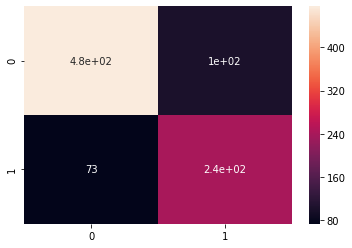

In [62]:
mat = confusion_matrix(y_pred, y_train)
sns.heatmap(mat, annot = True)
# print(classification_report(y_pred, y_train))

In [65]:
y_pred_test = model.predict(test_new)
y_pred_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
y_titanic = pd.DataFrame(y_pred_test)